# Regression
Classification is the task of predicting a discrete class label, whereas **regression** is the task of predicting a continuous quantity. Some algorithms can be used for both classification and **regression**, if we apply small modifications: Decision trees and artificial neural networks.

This tutorial of our regression tutorial will deal with the **MLPRegressor** model from **sklearn.neural network**. It is a Neural Network model for regression problems. The name is an acronym for multi-layer perceptron regression system. MLP or multi-layer perceptron is an artificial neural network (ANN), which consistsof a minimum of three layers:
* an input layer
* one or more hidden layers
* an output layer

# Problem Statement
The aim of this tutorial is to build a regression model to predict old car prices. We will be using the **car price** dataset which contains 1435 observations and 8 variables, as descibed below:
1. **Price**: The price of the car in dollars.
2. **Age**: The age of the car in months.
3. **KM**: How many KMS did the car was used.
4. **HP**: Horsepower of the car.
5. **MetColor**: Whether the car has metallic color or not.
6. **CC**: The engine size of the car.
7. **Doors**: The number of doors in the car.
8. **Weight**: The weight of the car.

# Loading the data for regression
We will load the preprocessed data 'Car Prices Data.pkl'.

In [1]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

df = pd.read_pickle('CarPricesData.pkl')
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


# Splitting the Data into Training and Testing
We don’t use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as **Testing Data** and the remaining data is called **Training data** on which the model is built. Typically $70\%$ of data is used as Training data and the rest $30\%$ is used as Testing data.

In [2]:
# Separate Target Variable and Predictor Variables
X = df.drop('Price', axis = 1)
y = df['Price']
#print(X)
#print(y)

In [3]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


In [5]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Storing the fit object for later reference
scaler = sc.fit(X_train)

# Generating the standardized values of X_train and X_test.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#print(X_train_fit)
#print(X_test_fit)
#print(y_train_fit)
#print(y_test_fit)

# MLPRegressor

In [6]:
from sklearn.neural_network import MLPRegressor

In [7]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

# Model Evaluation

In [8]:
y_pred = mlp_reg.predict(X_test)

In [9]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
753,9950,9696.043823
858,7995,9822.063674
630,7500,8491.509404
1412,9950,9201.052857
975,8950,8721.870222


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

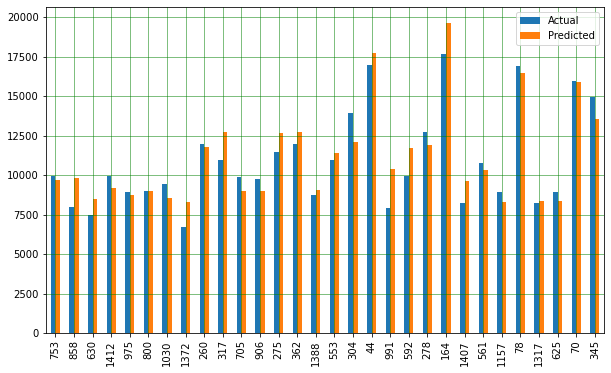

In [11]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [12]:
from sklearn import metrics

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 936.6198609795703
Mean Squared Error: 1557126.0465879678
Root Mean Squared Error: 1247.8485671698982


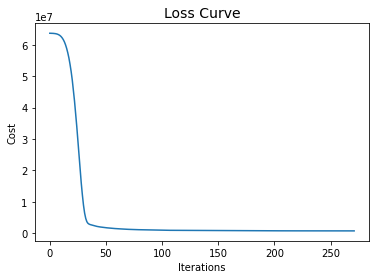

In [14]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Hyper Parameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [24]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 448, in _fit
    raise ValueError(
Valu

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
grid_predictions = grid.predict(X_test) 

In [19]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
753,9950,8962.959264
858,7995,9625.894876
630,7500,8782.057018
1412,9950,9370.420176
975,8950,9265.184221


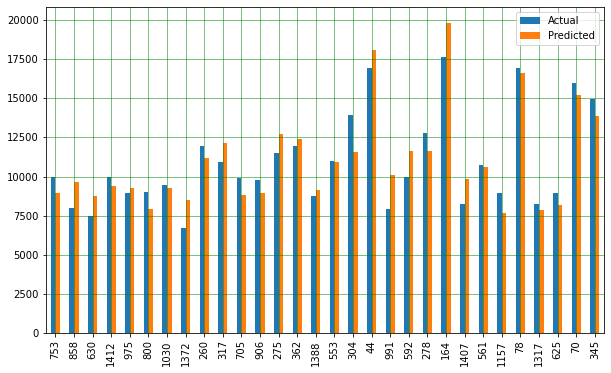

In [20]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error: 1079.975741602179
Mean Squared Error: 1991597.6823883173
Root Mean Squared Error: 1411.2397678595644
